# Ayuda slides

In [1]:
print '''Copy the next code into a first Raw NBconvert Cell to avoid display the commands
<style type="text/css">
.input, .output_prompt {
display:none !important;
}
</style>
'''

Copy the next code into a first Raw NBconvert Cell to avoid display the commands
<style type="text/css">
.input, .output_prompt {
display:none !important;
}
</style>



b to hide presentation
Links:
* http://stackoverflow.com/questions/20441848/how-do-i-separate-slides-when-exporting-an-ipython-notebook-to-reveal-js    
* http://www.slideviper.oquanta.info/tutorial/slideshow_tutorial_slides.html#/7  
* https://seqqc.wordpress.com/2015/02/22/make-slides-with-ipython-notebook/
* http://hannes-brt.github.io/blog/2013/08/11/ipython-slideshows-will-change-the-way-you-work/

The following commands gives the separation of slides and arrows:

In [2]:
%%bash
ipython nbconvert Indicadores-articulos.ipynb --to slides --reveal-prefix "http://cdn.jsdelivr.net/reveal.js/2.6.2" && cp Indicadores-articulos.slides.html /var/www/downloads
git commit -am "Slides update"
git push origin master

[master 699712e] Slides update
 8 files changed, 11209 insertions(+), 9324 deletions(-)
 rewrite utilities/newcitations.csv (95%)


[NbConvertApp] Using existing profile dir: u'/home/restrepo/.ipython/profile_default'
[NbConvertApp] Converting notebook Indicadores-articulos.ipynb to slides
[NbConvertApp] Support files will be in Indicadores-articulos_files/
[NbConvertApp] Loaded template slides_reveal.tpl
[NbConvertApp] Writing 827700 bytes to Indicadores-articulos.slides.html
remote: This repository moved. Please use the new location:        
remote:   https://github.com/restrepo/gssis.git        
To git@github.com:rescolo/gssis.git
   35e57e8..699712e  master -> master


The resulting slides are here:

http://gfif.udea.edu.co/downloads/Indicadores-articulos.slides.html#/

or

http://htmlpreview.github.io/?https://github.com/restrepo/gssis/blob/master/pandas/Indicadores-articulos.slides.html#/

<h1>Indicadores Instituto de Física</h1>
<h3>Diego Restrepo</h3>

http://stackoverflow.com/a/17231361

<h2 id="Articulos">Artículos</h2>
###Metodologia
Desde el perfil de [Google Scholar](https://scholar.google.com/citations?sortby=pubdate&hl=en&user=mxSOjTYAAAAJ&view_op=list_works) para el Instituto, se exportan todos los artículos en formato cvs.

Con el programa `cvsreader_udea.py` en la carpeta `utilities` del repositorio  de GitHub [`gssis`](https://github.com/restrepo/gssis) se añade la siguiente información:  

* El [DOI](http://search.crossref.org), usando el título y el apellido del primer autor de la publicación

* Con del DOI se pueden verificar todos los metadatos. En partcular el nombre exacto de la revista. [Ejemplo](http://api.crossref.org/works/10.1103/PhysRevD.93.015012) 

* Con el nombre exacto de la revista se obtiene la clasificación de Colciencias y su ISSN asociado desde la versión en [google spreadsheet](https://docs.google.com/spreadsheets/d/1umgapW8KOIPqmu_hyjon3n2SXbnbDlmnRnXzjUHcXHE/edit?usp=drive_web) del arhivo en excel del Publindex de Colciencias para revistas homologadas. (Se carga el csv desde el código)

* Con el ISSN se obtiene el factor de impacto con: [búsqueda de Google](https://goo.gl/JMHmhS)

Citaciones...

Finalmente el program extrae el primer autor de la UdeA de la lista de autores y le asocia el Grupo de Investigación correspondiente.

El resultado final esta en el [repositorio de GitHub](https://github.com/restrepo/gssis/blob/master/utilities/newcitations.csv)

##  Análisis de datos

In [3]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


In [4]:
import pandas as pd
import numpy as np
import datetime
import re

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth',500)
def read_google_cvs(gss_url="http://spreadsheets.google.com",\
    gss_format="csv",\
    gss_key="0AuLa_xuSIEvxdERYSGVQWDBTX1NCN19QMXVpb0lhWXc",\
    gss_sheet=0,\
    gss_query="select B,D,E,F,I where (H contains 'GFIF') order by D desc",\
    gss_keep_default_na=False
    ):
    import urllib
    """
    read a google spreadsheet in cvs format and return a pandas DataFrame object.
       ....
       gss_keep_default_na: (False) Blank values are filled with NaN
    """
    issn_url="%s/tq?tqx=out:%s&tq=%s&key=%s&gid=%s" %(gss_url,\
                                           gss_format,\
                                           gss_query,\
                                           gss_key,\
                                           str(gss_sheet))

    gfile=urllib.urlopen(issn_url)
    return pd.read_csv(gfile,keep_default_na=gss_keep_default_na)

def plainstr(stra):
    return stra.replace('á','a').replace('é','e').replace('í','i').\
                replace('ó','o').replace('ú','u').replace('ñ','n')

In [5]:
df=pd.read_csv('https://raw.githubusercontent.com/restrepo/gssis/master/utilities/newcitations.csv')
df.columns

Index([u'Year', u'Type', u'Authors', u'Publication', u'Volume', u'Pages', u'ISSN', u'Title', u'Impreso', u'PDF', u'Group', u'DOI', u'Type II', u'Proyect ID', u'Institution Authors', u'Colciencias Clasification', u'Impact Factor', u'Proyecto', u'NPages'], dtype='object')

In [6]:
df['Año']=df.Year
df['Tipo']=df.Type
df['Autor(es)']=df.Authors
df['Artículo']=df.Title
df['Vol.']=df.Volume
df['pág.']=df.Pages
df['Revista']=df.Publication
df['Grupo']=df.Group
df['Clasificación Colciencias']=df['Colciencias Clasification']
df['Factor de Impacto']=df['Impact Factor']

## Including citations...
To include in official code cvsreader_udea.py

In [7]:
pc=read_google_cvs(gss_key='1yQXdQdzsX9zBeui52bMcnN-JMt87ofHDjA58kwGJsdI',gss_query="select *")
df['Cites']=0
df['Simple']=df.Title.str.replace(r"[^a-zA-Z0-9 ]", " ").str.lower().str.replace('\s+','')
pc['Simple']=pc.Article.str.replace(r"[^a-zA-Z0-9 ]", " ").str.lower().str.replace('\s+','')
for i in range(df.shape[0]):
    mt=pc[pc.Simple.str.match(df.Simple[i])]
    if len(mt)>=1:
        rmt=mt
        if len(mt)>1:
            if len(mt[mt.Simple.str.contains(str(df.Volume[i]))])>0: #if 0 keep old match
                rmt=mt[mt.Simple.str.contains(str(df.Volume[i]))] #if >1 is a repeated entry
        
        df['Cites'][i]=rmt.Cites.replace('*','').replace('','0').astype(int).max()

Expected 12994 (Feb. 2016)

In [8]:
df.Cites.sum()

92

### Filtramos las publicadas
Las que tienen ISSN o el DOI.

Se muestran algunos resultados...

In [9]:
publicadas=df[~np.logical_and(df['ISSN']=='0000-0000',df['DOI']=='Not DOI')]
publicadas=publicadas.reset_index(drop=True)
publicadas=publicadas.replace('','Desconocido')
publicadas['First_UdeA_Author']=publicadas['Institution Authors'].fillna('NN')\
.str.replace('Mora Ramos Miguel; ','').str.replace(';.*','')

#Ejemplo visualización
publicadas[['Año','Autor(es)','Artículo','Vol.','pág.','ISSN','Revista','Grupo','DOI','Clasificación Colciencias','Factor de Impacto','First_UdeA_Author']][publicadas['DOI']!='Not DOI'][-5:]

/usr/local/lib/python2.7/dist-packages/pandas/core/common.py:381: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask = arr == x


,Año,Autor(es),Artículo,Vol.,pág.,ISSN,Revista,Grupo,DOI,Clasificación Colciencias,Factor de Impacto,First_UdeA_Author
34,2016,"Arbeláez, Carolina; Longas, Robinson; Restrepo, Diego; Zapata, Oscar;",Fermion dark matter from SO (10) GUTs,93,13012,1550-7998,Physical Review D,GFIF: Grupo de Fenomenología de Interacciones Fundamentales,10.1103/physrevd.93.013012,A1,"4,691",Restrepo Quintero Diego Alejandro
35,2015,"Hollyhead, Katherine; Bastian, Nate; Adamo, Angela; Silva-Villa, Esteban; Dale, Jim; Ryon, JE; Gazak, Zack;","Studying the YMC population of M83: how long clusters remain embedded, their interaction with the ISM and implications for GC formation theories",449,1106,0035-8711,Monthly Notices of the Royal Astronomical Society,FACOM: Física y Astrofísica Computacional,10.1093/mnras/stv331,A1,"5,521",Silva Villa Esteban
36,2014,"Bastian, N; Adamo, Angela; Schirmer, M; Hollyhead, K; Beletsky, Y; Carraro, G; Davies, B; Gieles, M; Silva-Villa, E;",The effect of spatial resolution on optical and near-IR studies of stellar clusters: implications for the origin of the red excess,444,3829,0035-8711,Monthly Notices of the Royal Astronomical Society,FACOM: Física y Astrofísica Computacional,10.1093/mnras/stu1695,A1,"5,521",Silva Villa Esteban
37,2015,"Niederhofer, Florian; Hilker, Michael; Bastian, Nate; Silva-Villa, Esteban;",No evidence for significant age spreads in young massive LMC clusters,575,62,0000-0000,Astronomy & Astrophysics,FACOM: Física y Astrofísica Computacional,10.1051/0004-6361/201424455,00,"-1,0",Silva Villa Esteban
38,2014,"Ceballos, Jorge A; Giraldo, Marco A; Cossio, Pilar;",Effects of a disulfide bridge prior to amyloid formation of the ABRI peptide,4,36923,0000-0000,RSC Advances,Biofísica,10.1039/C4RA06034B,00,"-1,0",Giraldo Cadavid Marco A.


In [10]:
publicadas['Factor de Impacto']=publicadas['Factor de Impacto'].replace('Desconocido',-1)
publicadas['Factor de Impacto']=publicadas['Factor de Impacto'].str.replace(',','.').astype(float)
publicadas['Grupo']=publicadas['Grupo'].fillna('Unknown')

### Publicada últimos 5 años

In [11]:
publicadas5=publicadas[publicadas['Año']>datetime.datetime.now().year-5]

### Datos a analizar del TOTAL en Google Scholar:

In [12]:
dfp=pd.DataFrame()
dfp.append({'TOTAL':df.shape[0],'Publicadas':publicadas.shape[0],\
            'Publicadas últimos 5 años':publicadas5.shape[0]},ignore_index=True)

,Publicadas,Publicadas últimos 5 años,TOTAL
0,39,37,44


### Preparando la tabla de datos

## Estudiantes

In [13]:
config_inf={'DEBUG':False} #Development mode
config_inf['Years']=range(1995,2016)

In [14]:
dfd=read_google_cvs(gss_key="0AuLa_xuSIEvxdERYSGVQWDBTX1NCN19QMXVpb0lhWXc",gss_query="select *",gss_sheet=2)
dfd['PROGRAMA']='Doctorado'
dfm=read_google_cvs(gss_key="0AuLa_xuSIEvxdERYSGVQWDBTX1NCN19QMXVpb0lhWXc",gss_query="select *",gss_sheet=1)
dfm['PROGRAMA']='Maestría'
dfe=dfd.append(dfm)
dfe.columns

Index([u'ASESOR', u'Becado de', u'CODIRECTOR', u'CORREO', u'Cédula', u'Distinción', u'Doble titulación', u'ESTANTE', u'ESTUDIANTE', u'Estado', u'Estado Laboral', u'Fecha de graduación', u'Fecha de ingreso', u'Fecha de sustentación', u'GRUPO', u'INSTITUTO', u'JURADO 1', u'JURADO 2', u'JURADO 3', u'Materias matriculas semestre 2011-1', u'NOMBRE TESIS', u'PROGRAMA', u'Pasantía', u'Proyecto ID', u'SIGNATURA', u'Situación', u'Unnamed: 0'], dtype='object')

In [15]:
dfe['Año de ingreso']=dfe['Fecha de ingreso'].replace('','0').replace('null','0').str.replace('-1','').str.replace('-2','').astype('int')
dfe['Año de graduación']=dfe['Fecha de graduación'].replace('','0').replace('null','0').str.replace('-1','').str.replace('-2','').astype('int')#.values
#dfe['Año de graduación'].values
dfei=dfe[dfe['Año de ingreso']>=config_inf['Years'][0]].reset_index(drop=True)
dfeg=dfe[dfe['Año de graduación']>=config_inf['Years'][0]].reset_index(drop=True)

### Estudiantes admitidos y matriculados

In [16]:
dfeit=dfei[np.logical_or(dfei['Estado']=='Activo',dfei['Estado']=='Graduado')]
dfeit[['Año de ingreso','Estado']]
dfei.groupby('Año de ingreso').count()['ASESOR'][::-1]

Año de ingreso
2016              12
2015               8
2014              28
2013              19
2012              14
2011              10
2010              12
2009               8
2008              15
2007               8
2006              18
2005              13
2004              11
2003               3
2002               5
2001               7
2000               2
1999               4
1998               6
1997               3
1995               2
Name: ASESOR, dtype: int64

### Artículos con participación de estudiantes

In [17]:
dfei=dfei[dfei.Estado!='Desertor'].reset_index(drop=True)
#Estudiantes
student_coauthor=1 #until 2 years after graduation date
dfd=pd.Series()
art_est=pd.Series()
dfd['D']=dfei[dfei.PROGRAMA=='Doctorado'].reset_index(drop=True)
dfd['M']=dfei[dfei.PROGRAMA=='Maestría'].reset_index(drop=True)
dfd['P']=dfei
for k in dfd.keys():
    art_est[k]=pd.DataFrame()
#phdest=pd.DataFrame()
    dfd[k]['Author']=''
    for i in range(dfd[k].shape[0]):
        est=re.sub('\s+$','',re.sub('^\s+','',dfd[k]['ESTUDIANTE'][i])).replace('  ',' ').split(' ')
        if len(est)==4:
            dfd[k]['Author'][i]='%s, %s' %(plainstr(est[2]),est[0][0])
        elif len(est)==3:        
            dfd[k]['Author'][i]='%s, %s' %(plainstr(est[1]),est[0][0])
        elif len(est)==2:
            dfd[k]['Author'][i]='%s, %s' %(plainstr(est[1]),est[0][0])
        else:
            dfd[k]['Author'][i]='%s, %s' %(plainstr(est[-1]),est[0][0])
        #special cases
        if dfd[k]['Author'][i]=='Duque, C':
            dfd[k]['Author'][i]='Duque, CM'
    
        ma=publicadas[publicadas['Autor(es)'].str.contains(dfd[k]['Author'][i])]
        if ma.shape[0]>0:
            ma['Estudiante']=dfd[k]['Author'][i]
            ma['Año Graduación']=dfd[k]['Fecha de graduación'][i]
            if dfd[k]['Fecha de graduación'][i]!='':
                ya=eval(re.sub('-[12]$','',dfd[k]['Fecha de graduación'][i]))+student_coauthor
                ma=ma[ma['Año']<=ya]
    
        art_est[k]=art_est[k].append(ma)
        #phdest=phdest.append({'ESTUDIANTE':dfd[k]['ESTUDIANTE'][i],'Autor':dfd['Author'][i],\
        #                        'Fecha de graduación':dfd[k]['Fecha de graduación'][i],\
        #                        'Artículos':ma.shape[0]},ignore_index=True)

    #Filter pandas dataframe
    #Fill from phd_students.xlsx (see below) to cross check the data
    art_est[k]=art_est[k].drop_duplicates().reset_index(True).sort('Año',ascending=False).reset_index(drop=True)
    art_est[k]=art_est[k][['Tipo','Artículo','Autor(es)','Año Graduación','Año','Revista','ISSN','Estudiante']]

In [18]:
autor=pd.Series()
autor['Posgrado']=art_est.P.groupby('Año').count().Tipo[::-1]
autor['Doctorado']  =art_est.D.groupby('Año').count().Tipo[::-1]
autor['Master']=art_est.M.groupby('Año').count().Tipo[::-1]

In [19]:
autor.Posgrado.astype(int)

Año
2016    1
2015    4
2014    2
2013    1
Name: Tipo, dtype: int64

In [20]:
t=publicadas['Año'].value_counts()
i=publicadas[publicadas.Tipo=='Internacional']['Año'].value_counts()
n=publicadas[publicadas.Tipo=='Nacional']['Año'].value_counts()
facom=publicadas[publicadas.Grupo.str.contains('FACOM')]['Año'].value_counts()

In [21]:
rdf=pd.DataFrame()
for y in range(1995,2016)[::-1]:
    year=False
    if y in t.keys():
        na=t[y]
    else: na=0
    if y in i.keys():
        ni=i[y]
    else: ni=0
    if y in n.keys():
        nn=n[y]
    else: nn=0
    if y in facom.keys():
        nfacom=facom[y]
    else: nfacom=0
    for k in ['Posgrado','Master','Doctorado']:
        if not y in autor[k]:
            autor[k][y]=0
    #FAudea=publicadas[publicadas['Año']==y]['Institution Authors'].fillna('NN')\
    #.str.replace('Mora Ramos Miguel; ','').str.replace(';.*','').unique().shape[0]
    FAudea=publicadas[publicadas['Año']==y]['First_UdeA_Author'].unique().shape[0]
    Audea=np.unique(publicadas[publicadas['Año']==y]['Institution Authors'].fillna('NN').str.split('; ').sum()).shape[0]
        
    rdf=rdf.append({'year':y,'articles':na,'isi_o_scopus':ni,'nacional':nn,'facom':nfacom,\
                   'first_UdeA_author':FAudea,'UdeA_author':Audea,\
                   'autor_posgrado':autor.Posgrado[y],'autor_master':autor.Master[y],\
                    'autor_doctorado':autor.Doctorado[y]},ignore_index=True)

rdf

,UdeA_author,articles,autor_doctorado,autor_master,autor_posgrado,facom,first_UdeA_author,isi_o_scopus,nacional,year
0,15,24,4,1,4,3,13,23,1,2015
1,5,7,0,2,2,2,5,6,1,2014
2,2,2,0,1,1,0,2,2,0,2013
3,1,0,0,0,0,0,0,0,0,2012
4,1,0,0,0,0,0,0,0,0,2011
5,1,1,0,0,0,0,1,0,1,2010
6,1,0,0,0,0,0,0,0,0,2009
7,1,0,0,0,0,0,0,0,0,2008
8,1,0,0,0,0,0,0,0,0,2007
9,1,0,0,0,0,0,0,0,0,2006


### Resultado

En el plano número de artículos en función del año. Se añade la información de cuantos primeros autores de la UdeA participan en los artículos

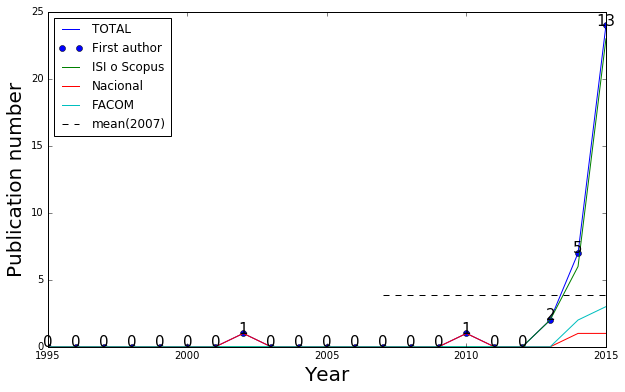

In [22]:
plt.plot(rdf.year,rdf.articles,label='TOTAL')
plt.plot(rdf.year,rdf.articles,'bo',label='First author')
plt.plot(rdf.year,rdf.isi_o_scopus,label='ISI o Scopus')
plt.plot(rdf.year,rdf.nacional,label='Nacional')
plt.plot(rdf.year,rdf.facom,label=u'FACOM')
plt.hlines(rdf[rdf.year>2007].isi_o_scopus.mean(),2007,rdf.year.values[0],linestyles='dashed',label='mean(2007)')
plt.legend(loc='best')
for i in range(len(rdf.year)):
    plt.annotate(str(int(rdf.first_UdeA_author[i])),xy=(rdf.year[i],rdf.articles[i]),\
                 horizontalalignment='center',size=15)
plt.xlabel('Year',size=20)
plt.ylabel('Publication number',size=20)

O en términos del número de autores diferentes de la UdeA que participan en los artículos

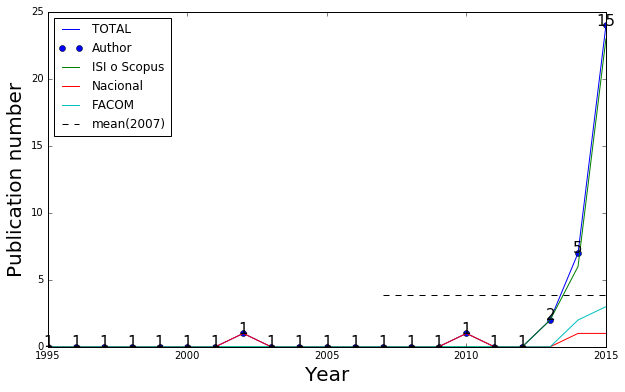

In [23]:
plt.plot(rdf.year,rdf.articles,label='TOTAL')
plt.plot(rdf.year,rdf.articles,'bo',label='Author')
plt.plot(rdf.year,rdf.isi_o_scopus,label='ISI o Scopus')
plt.plot(rdf.year,rdf.nacional,label='Nacional')
plt.plot(rdf.year,rdf.facom,label=u'FACOM')
plt.hlines(rdf[rdf.year>2007].isi_o_scopus.mean(),2007,rdf.year.values[0],linestyles='dashed',label='mean(2007)')
plt.legend(loc='best')
for i in range(len(rdf.year)):
    plt.annotate(str(int(rdf.UdeA_author[i])),xy=(rdf.year[i],rdf.articles[i]),\
                 horizontalalignment='center',size=15)
plt.xlabel('Year',size=20)
plt.ylabel('Publication number',size=20)

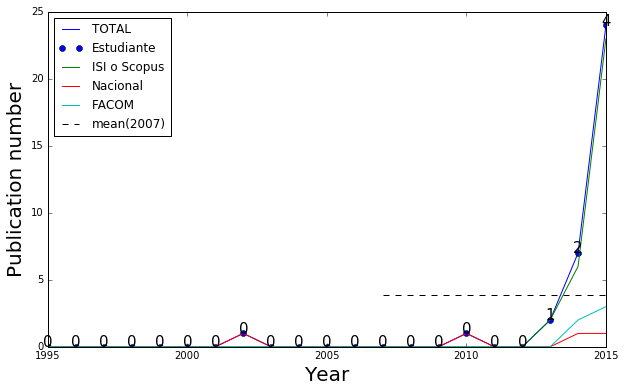

In [24]:
plt.plot(rdf.year,rdf.articles,label='TOTAL')
plt.plot(rdf.year,rdf.articles,'bo',label='Estudiante')
plt.plot(rdf.year,rdf.isi_o_scopus,label='ISI o Scopus')
plt.plot(rdf.year,rdf.nacional,label='Nacional')
plt.plot(rdf.year,rdf.facom,label=u'FACOM')
plt.hlines(rdf[rdf.year>2007].isi_o_scopus.mean(),2007,rdf.year.values[0],linestyles='dashed',label='mean(2007)')
plt.legend(loc='best')
for i in range(len(rdf.year)):
    plt.annotate(str(int(rdf.autor_posgrado[i])),xy=(rdf.year[i],rdf.articles[i]),\
                 horizontalalignment='center',size=15)
plt.xlabel('Year',size=20)
plt.ylabel('Publication number',size=20)

2009 Team

In [25]:
pd.Series(dict(zip(range(values.shape[0]), values)))

NameError: name 'values' is not defined

###Conclusión
Se ha alcanzado un valor asintótico

H0 lo separó en H 0 y no lo encontró: solución: admita alguna palabras faltantes en títulos largos:

* http://dx.doi.org/10.1209/0295-5075/109/39002 

### Primeros autores UdeA
Primeros 15

####  Histórico

In [ ]:
publicadas['First_UdeA_Author'].value_counts()[:15].plot(kind='barh', rot=0, grid=True)
plt.xlabel(u'Número de artículos',size=20)

#### Últimos cinco años

In [ ]:
publicadas5['First_UdeA_Author'].value_counts()[:15].plot(kind='barh', rot=0, grid=True)#
plt.xlabel(u'Número de artículos',size=20)

###Conclusión
Se nota el relevo generacional

### Por Grupos de Investigación

Ejemplos plots con `pandas`: http://pandas.pydata.org/pandas-docs/dev/visualization.html

In [ ]:
publicadas['Grupo'].value_counts()[:10].plot(kind='barh', rot=0, grid=True)
plt.xlabel(u'Número de artículos',size=20)

### Últimos cinco años

In [ ]:
publicadas5['Grupo'].value_counts()[:10].plot(kind='barh', rot=0,grid=True)
plt.xlabel(u'Número de artículos',size=20)

### Internacionales y Nacionales

The group counts, analogous to the value_counts function above, can be computed
    using size. This result is then reshaped into a table with unstack:

In [ ]:
tipo5 = np.where(publicadas5['Tipo'].str.contains('Internacional'),'Internacional', 'Nacional')
by_group_tipo5 = publicadas5.groupby(['Grupo', tipo5])
gt_counts = by_group_tipo5.size().unstack().fillna(0)
indexer = gt_counts.sum(1).argsort()
count_subset = gt_counts.take(indexer)
count_subset[4:].plot(kind='barh', stacked=True,grid=True)
plt.xlabel(u'Número de artículos',size=20)

### Clasificación Colciencias

In [ ]:
total=publicadas['Clasificación Colciencias'].value_counts()
print "Total A1+A2: ",total['A1']+total['A2']

In [ ]:
publicadas['Clasificación Colciencias'].value_counts().plot(kind='barh',grid=True)
plt.xlabel(u'Número de artículos',size=20)

#### Últimos cinco  años

In [ ]:
total=publicadas5['Clasificación Colciencias'].value_counts()
print "Total A1+A2: ",total['A1']+total['A2']

In [ ]:
publicadas5['Clasificación Colciencias'].value_counts().plot(kind='barh',grid=True)
plt.xlabel(u'Número de artículos',size=20)

#### Publicadas último año

In [ ]:
import datetime
publicadas1=publicadas[publicadas['Año']>datetime.datetime.now().year-1]
len(publicadas1)

<h2 id="FI">Factor de impacto</h2>
### Factor de impacto (FI) en revistas con FI>0
Factor de impacto de los últimos 4 años. Para publicaciones muy antigüas se usa el FI más antigüo

In [ ]:
fi=publicadas[['Factor de Impacto']].replace('null',0)
fii=fi[fi['Factor de Impacto']>0].reset_index(drop=True)
fii.astype('float')['Factor de Impacto'].hist()
plt.ylabel(u'Número de artículos',size=20)
plt.xlabel(u'Factor de impacto',size=20)

In [ ]:
for group in ['GFIF','GES','GFAM','GMC','GOF','MS','FACOM']:
    fi=publicadas[publicadas['Grupo'].str.contains(group)][['Factor de Impacto']].replace('null',0)
    fii=fi[fi['Factor de Impacto']>0].reset_index(drop=True)
    fii.astype('float')['Factor de Impacto'].hist(label=group) 
    plt.legend(loc='best')
    plt.ylabel(u'Número de artículos',size=20)
    plt.xlabel(u'Factor de impacto',size=20)

### Últimos cinco años

In [ ]:
publicadas5['Factor de Impacto']=publicadas5['Factor de Impacto'].replace('Desconocido',-1)
fi=publicadas5[['Factor de Impacto']].replace('null',0)
fii=fi[fi['Factor de Impacto']>0].reset_index(drop=True)
fii.astype('float')['Factor de Impacto'].hist()
plt.ylabel(u'Número de artículos',size=20)
plt.xlabel(u'Factor de impacto',size=20)

In [ ]:
for group in ['GFIF','GES','GFAM','GMC','GOF','MS','FACOM']:
    fi=publicadas5[publicadas5['Grupo'].str.contains(group)][['Factor de Impacto']].replace('null',0)
    fii=fi[fi['Factor de Impacto']>0].reset_index(drop=True)
    fii.astype('float')['Factor de Impacto'].hist(label=group) 
    plt.legend(loc='best')
    plt.ylabel(u'Número de artículos',size=20)
    plt.xlabel(u'Factor de impacto',size=20)

In [ ]:
for group in ['GMC','GFAM']:
    fi=publicadas5[publicadas5['Grupo'].str.contains(group)][['Factor de Impacto']].replace('null',0)
    fii=fi[fi['Factor de Impacto']>0].reset_index(drop=True)
    fii.astype('float')['Factor de Impacto'].hist(label=group) 
    plt.legend(loc='best')
    plt.ylabel(u'Número de artículos',size=20)
    plt.xlabel(u'Factor de impacto',size=20)

In [ ]:
for group in ['GMC','GES']:
    fi=publicadas5[publicadas5['Grupo'].str.contains(group)][['Factor de Impacto']].replace('null',0)
    fii=fi[fi['Factor de Impacto']>0].reset_index(drop=True)
    fii.astype('float')['Factor de Impacto'].hist(label=group) 
    plt.legend(loc='best')
    plt.ylabel(u'Número de artículos',size=20)
    plt.xlabel(u'Factor de impacto',size=20)

In [ ]:
#0120-2650 revista colombiana de Fisica
#Physical Review D -> Jose David
#10.1038/nature09084
publicadas[publicadas['Grupo']=='Unknown'].sort('Year').shape

In [ ]:
df[np.logical_and(df.DOI=='Not DOI',df.ISSN=='0000-0000')].shape